In [50]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [60]:

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [32]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

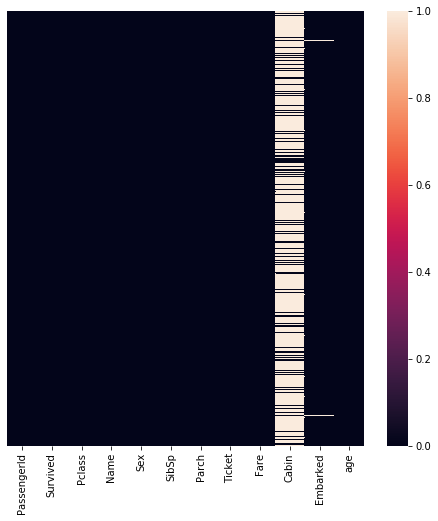

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), yticklabels= False)

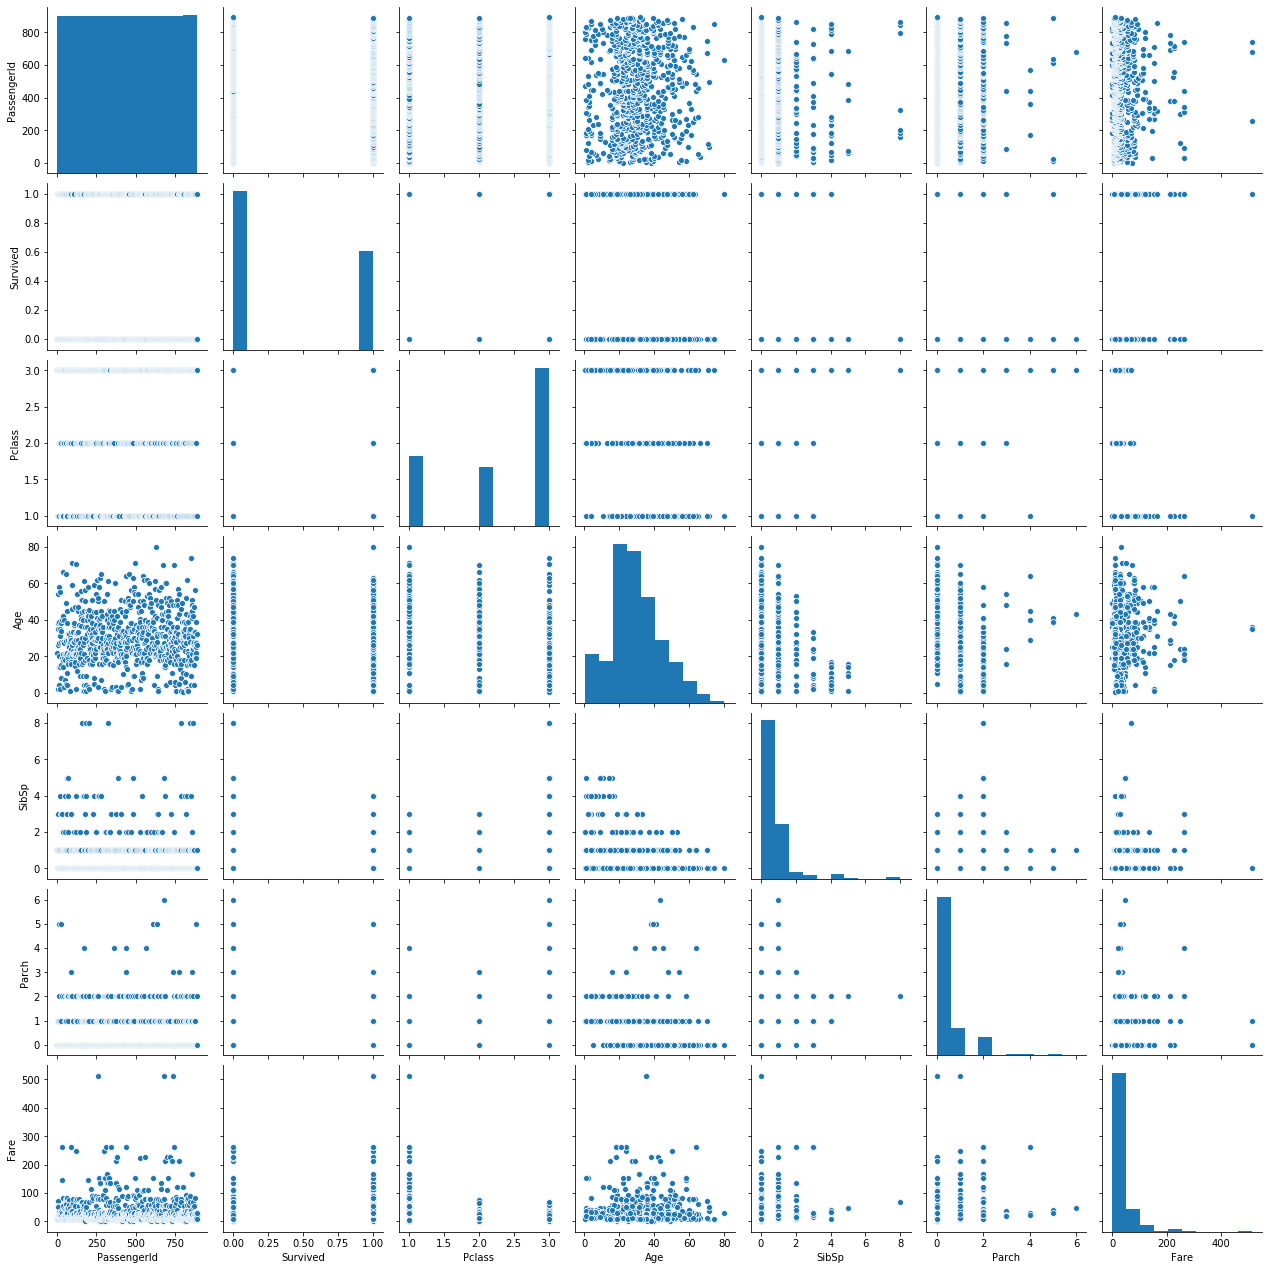

In [34]:
sns.pairplot(df)

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

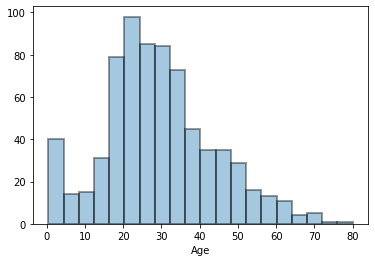

In [47]:
sns.distplot(df['Age'], kde = False, hist_kws = dict(linewidth=2, edgecolor = 'k') )

In [37]:
df['Age'].mean()

29.69911764705882

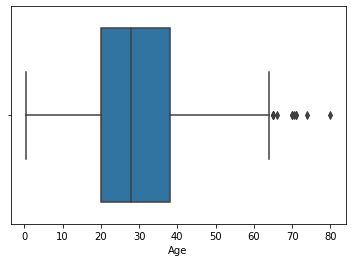

In [38]:
sns.boxplot(df['Age'])

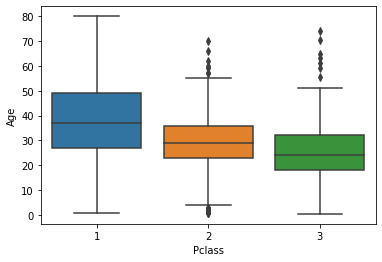

In [57]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df, orient ='v' )

In [64]:
df[df['Pclass']==3]['Age'].mean()

25.14061971830986

In [59]:
df[df['Pclass']==1]['Age'].median()

37.0

In [67]:
def age_append(cols):
    age = cols[0]
    pclass= cols[1]
    
    
    if pd.isnull(age):
        if pclass ==1:
            return 38.23
        if pclass == 2:
            return 29.87
        if pclass == 3:
            return 25.14
    else:
        return age

In [72]:
df['age'] = df[['Age','Pclass']].apply(age_append, axis = 1)

In [94]:

df.drop(['Age'], inplace = True, axis = 1)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex  SibSp  Parch  \
0                              Braund, Mr. Owen Harris    male      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                               Heikkinen, Miss. Laina  female      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                             Allen, Mr. William Henry    male      0      0   
..                                                 ...     ...    ...    ...   
886                              Montvila, Rev. Juozas    male      0      0   
887                       Graham, Miss. Margaret Edith  female      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female      1      2   
889                              Behr, Mr. Karl Howell    male      0      0   
890                                Dooley, Mr. Patrick    male      0      0   

               Ticket     Fare Cabin Embarked    age  
0           A/5 21171   7.2500   NaN        S  22.00  
1            PC 17599  71.2833   C85        C  38.00  
2    STON/O2. 3101282   7.9250   NaN        S  26.00  
3              113803  53.1000  C123        S  35.00  
4              373450   8.0500   NaN        S  35.00  
..                ...      ...   ...      ...    ...  
886            211536  13.0000   NaN        S  27.00  
887            112053  30.0000   B42        S  19.00  
888        W./C. 6607  23.4500   NaN        S  25.14  
889            111369  30.0000  C148        C  26.00  
890            370376   7.7500   NaN        Q  32.00  

[891 rows x 12 columns]

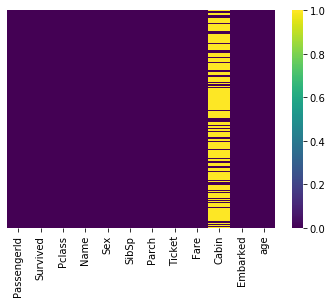

In [90]:
sns.heatmap(df.isnull(), yticklabels= False, cmap = 'viridis')

In [96]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[df['Pclass']==1][['Cabin', 'Pclass', 'Survived']]

Cabin  Pclass  Survived
1                C85       1         1
3               C123       1         1
6                E46       1         0
11              C103       1         1
23                A6       1         1
27       C23 C25 C27       1         0
30               NaN       1         0
31               B78       1         1
34               NaN       1         0
35               NaN       1         0
52               D33       1         1
54               B30       1         0
55               C52       1         1
61               B28       1         1
62               C83       1         0
64               NaN       1         0
83               NaN       1         0
88       C23 C25 C27       1         1
92               E31       1         0
96                A5       1         0
97           D10 D12       1         1
102              D26       1         0
110             C110       1         0
118          B58 B60       1         0
124              D26       1         0
136              D47       1         1
137             C123       1         0
139              B86       1         0
151               C2       1         1
155              NaN       1         0
166              E33       1         1
168              NaN       1         0
170              B19       1         0
174               A7       1         0
177              C49       1         0
185              A32       1         0
187              NaN       1         1
194               B4       1         1
195              B80       1         1
209              A31       1         1
215              D36       1         1
218              D15       1         1
224              C93       1         1
230              C83       1         1
245              C78       1         0
248              D35       1         1
252              C87       1         0
256              NaN       1         1
257              B77       1         1
258              NaN       1         1
262              E67       1         0
263              B94       1         0
268             C125       1         1
269              C99       1         1
270              NaN       1         0
273             C118       1         0
275               D7       1         1
284              A19       1         0
290              NaN       1         1
291              B49       1         1
295              NaN       1         0
297          C22 C26       1         0
298             C106       1         1
299          B58 B60       1         1
305          C22 C26       1         1
306              NaN       1         1
307              C65       1         1
309              E36       1         1
310              C54       1         1
311  B57 B59 B63 B66       1         1
318               C7       1         1
319              E34       1         1
325              C32       1         1
329              B18       1         1
331             C124       1         0
332              C91       1         0
334              NaN       1         1
336               C2       1         0
337              E40       1         1
339                T       1         0
341      C23 C25 C27       1         1
351             C128       1         0
356              E33       1         1
366              D37       1         1
369              B35       1         1
370              E50       1         1
373              NaN       1         0
375              NaN       1         1
377              C82       1         0
380              NaN       1         1
383              NaN       1         1
390          B96 B98       1         1
393              D36       1         1
412              C78       1         1
430              C52       1         1
434              E44       1         0
435          B96 B98       1         1
438      C23 C25 C27       1         0
445              A34       1         1
447              NaN       1         1
449             C104       1         1
452             C111       1         

In [97]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

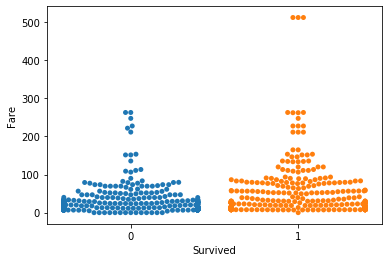

In [100]:
sns.swarmplot(x=df['Survived'], y = df['Fare'] )

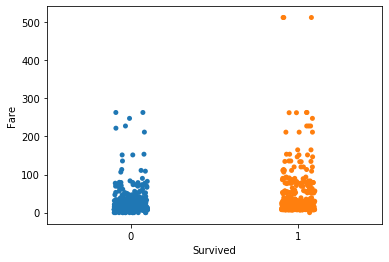

In [101]:
sns.stripplot(x=df['Survived'], y = df['Fare'] )

In [102]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

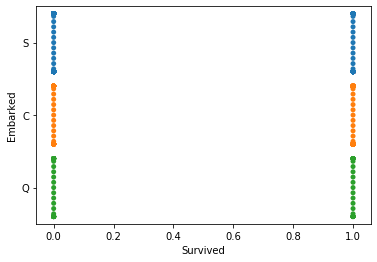

In [103]:
sns.swarmplot(x=df['Survived'], y = df['Embarked'] )

In [110]:
dummyem = pd.get_dummies(df['Embarked'], drop_first= True)

In [111]:
dummyem

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
5    1  0
6    0  1
7    0  1
8    0  1
9    0  0
10   0  1
11   0  1
12   0  1
13   0  1
14   0  1
15   0  1
16   1  0
17   0  1
18   0  1
19   0  0
20   0  1
21   0  1
22   1  0
23   0  1
24   0  1
25   0  1
26   0  0
27   0  1
28   1  0
29   0  1
30   0  0
31   0  0
32   1  0
33   0  1
34   0  0
35   0  1
36   0  0
37   0  1
38   0  1
39   0  0
40   0  1
41   0  1
42   0  0
43   0  0
44   1  0
45   0  1
46   1  0
47   1  0
48   0  0
49   0  1
50   0  1
51   0  1
52   0  0
53   0  1
54   0  0
55   0  1
56   0  1
57   0  0
58   0  1
59   0  1
60   0  0
61   0  0
62   0  1
63   0  1
64   0  0
65   0  0
66   0  1
67   0  1
68   0  1
69   0  1
70   0  1
71   0  1
72   0  1
73   0  0
74   0  1
75   0  1
76   0  1
77   0  1
78   0  1
79   0  1
80   0  1
81   0  1
82   1  0
83   0  1
84   0  1
85   0  1
86   0  1
87   0  1
88   0  1
89   0  1
90   0  1
91   0  1
92   0  1
93   0  1
94   0  1
95   0  1
96   0  0
97   0  0
98   0  1
99   0  1
100  0  1
101  0  1
102  0  1
103  0  1
104  0  1
105  0  1
106  0  1
107  0  1
108  0  1
109  1  0
110  0  1
111  0  0
112  0  1
113  0  1
114  0  0
115  0  1
116  1  0
117  0  1
118  0  0
119  0  1
120  0  1
121  0  1
122  0  0
123  0  1
124  0  1
125  0  0
126  1  0
127  0  1
128  0  0
129  0  1
130  0  0
131  0  1
132  0  1
133  0  1
134  0  1
135  0  0
136  0  1
137  0  1
138  0  1
139  0  0
140  0  0
141  0  1
142  0  1
143  1  0
144  0  1
145  0  1
146  0  1
147  0  1
148  0  1
149  0  1
150  0  1
151  0  1
152  0  1
153  0  1
154  0  1
155  0  0
156  1  0
157  0  1
158  0  1
159  0  1
160  0  1
161  0  1
162  0  1
163  0  1
164  0  1
165  0  1
166  0  1
167  0  1
168  0  1
169  0  1
170  0  1
171  1  0
172  0  1
173  0  1
174  0  0
175  0  1
176  0  1
177  0  0
178  0  1
179  0  1
180  0  1
181  0  0
182  0  1
183  0  1
184  0  1
185  0  1
186  1  0
187  0  1
188  1  0
189  0  1
190  0  1
191  0  1
192  0  1
193  0  1
194  0  0
195  0  0
196  1  0
197  0  1
198  1  0
199  0  1
200  0  1
201  0  1
202  0  1
203  0  0
204  0  1
205  0  1
206  0  1
207  0  0
208  1  0
209  0  0
210  0  1
211  0  1
212  0  1
213  0  1
214  1  0
215  0  0
216  0  1
217  0  1
218  0  0
219  0  1
220  0  1
221  0  1
222  0  1
223  0  1
224  0  1
225  0  1
226  0  1
227  0  1
228  0  1
229  0  1
230  0  1
231  0  1
232  0  1
233  0  1
234  0  1
235  0  1
236  0  1
237  0  1
238  0  1
239  0  1
240  0  0
241  1  0
242  0  1
243  0  1
244  0  0
245  1  0
246  0  1
247  0  1
248  0  1
249  0  1
250  0  1
251  0  1
252  0  1
253  0  1
254  0  1
255  0  0
256  0  0
257  0  1
258  0  0
259  0  1
260  1  0
261  0  1
262  0  1
263  0  1
264  1  0
265  0  1
266  0  1
267  0  1
268  0  1
269  0  1
270  0  1
271  0  1
272  0  1
273  0  0
274  1  0
275  0  1
276  0  1
277  0  1
278  1  0
279  0  1
280  1  0
281  0  1
282  0  1
283  0  1
284  0  1
285  0  0
286  0  1
287  0  1
288  0  1
289  1  0
290  0  1
291  0  0
292  0  0
293  0  1
294  0  1
295  0  0
296  0  0
297  0  1
298  0  1
299  0  0
300  1  0
301  1  0
302  0  1
303  1  0
304  0  1
305  0  1
306  0  0
307  0  0
308  0  0
309  0  0
310  0  0
311  0  0
312  0  1
313  0  1
314  0  1
315  0  1
316  0  1
317  0  1
318  0  1
319  0  0
320  0  1
321  0  1
322  1  0
323  0  1
324  0  1
325  0  0
326  0  1
327  0  1
328  0  1
329  0  0
330  1  0
331  0  1
332  0  1
333  0  1
334  0  1
335  0  1
336  0  1
337  0  0
338  0  1
339  0  1
340  0  1
341  0  1
342  0  1
343  0  1
344  0  1
345  0  1
346  0  1
347  0  1
348  0  1
349  0  1
350  0  1
351  0  1
352  0  0
353  0  1
354  0  0
355  0  1
356  0  1
357  0  1
358  1  0
359  1  0
360  0  1
361  0  0
362  0  0
363  0  1
364  1  0
365  0  1
366  0  0
367  0  0
368  1  0
369  0  0
370  0  0
371  0  1
372  0  1
373  0  0
374  0  1
375  0  0
376  0  1
377  0  0
378  0  0
379  0  1
380  0  0
381  0  0
382  0  1
383  0  1
384  0  1
385  0  1
386  0  1
387  0  1
388  1  0
389  0  0
390  0  1
391  0  1
392  0  1
393  0  0
394  0  1
395  0  1
396  0  1
397  0  1
398  0  1
399  

In [112]:
df = pd.concat([df, dummyem], axis = 1)

In [116]:
df.drop(['Embarked'], inplace = True, axis = 1)

In [118]:
df.drop('Name', axis =1, inplace = True)

In [120]:
df.drop('Ticket', axis =1, inplace = True)

In [122]:
df.drop('PassengerId', axis =1, inplace = True)

In [125]:
df

Survived  Pclass     Sex  SibSp  Parch      Fare            Cabin    age  \
0           0       3    male      1      0    7.2500              NaN  22.00   
1           1       1  female      1      0   71.2833              C85  38.00   
2           1       3  female      0      0    7.9250              NaN  26.00   
3           1       1  female      1      0   53.1000             C123  35.00   
4           0       3    male      0      0    8.0500              NaN  35.00   
5           0       3    male      0      0    8.4583              NaN  25.14   
6           0       1    male      0      0   51.8625              E46  54.00   
7           0       3    male      3      1   21.0750              NaN   2.00   
8           1       3  female      0      2   11.1333              NaN  27.00   
9           1       2  female      1      0   30.0708              NaN  14.00   
10          1       3  female      1      1   16.7000               G6   4.00   
11          1       1  female      0      0   26.5500             C103  58.00   
12          0       3    male      0      0    8.0500              NaN  20.00   
13          0       3    male      1      5   31.2750              NaN  39.00   
14          0       3  female      0      0    7.8542              NaN  14.00   
15          1       2  female      0      0   16.0000              NaN  55.00   
16          0       3    male      4      1   29.1250              NaN   2.00   
17          1       2    male      0      0   13.0000              NaN  29.87   
18          0       3  female      1      0   18.0000              NaN  31.00   
19          1       3  female      0      0    7.2250              NaN  25.14   
20          0       2    male      0      0   26.0000              NaN  35.00   
21          1       2    male      0      0   13.0000              D56  34.00   
22          1       3  female      0      0    8.0292              NaN  15.00   
23          1       1    male      0      0   35.5000               A6  28.00   
24          0       3  female      3      1   21.0750              NaN   8.00   
25          1       3  female      1      5   31.3875              NaN  38.00   
26          0       3    male      0      0    7.2250              NaN  25.14   
27          0       1    male      3      2  263.0000      C23 C25 C27  19.00   
28          1       3  female      0      0    7.8792              NaN  25.14   
29          0       3    male      0      0    7.8958              NaN  25.14   
30          0       1    male      0      0   27.7208              NaN  40.00   
31          1       1  female      1      0  146.5208              B78  38.23   
32          1       3  female      0      0    7.7500              NaN  25.14   
33          0       2    male      0      0   10.5000              NaN  66.00   
34          0       1    male      1      0   82.1708              NaN  28.00   
35          0       1    male      1      0   52.0000              NaN  42.00   
36          1       3    male      0      0    7.2292              NaN  25.14   
37          0       3    male      0      0    8.0500              NaN  21.00   
38          0       3  female      2      0   18.0000              NaN  18.00   
39          1       3  female      1      0   11.2417              NaN  14.00   
40          0       3  female      1      0    9.4750              NaN  40.00   
41          0       2  female      1      0   21.0000              NaN  27.00   
42          0       3    male      0      0    7.8958              NaN  25.14   
43          1       2  female      1      2   41.5792              NaN   3.00   
44          1       3  female      0      0    7.8792              NaN  19.00   
45          0       3    male      0      0    8.0500              NaN  25.14   
46          0       3    male      1      0   15.5000              NaN  25.14   
47          1       3  female      0      0    7.7500              NaN  25.14   
48          0       3    male      2

In [139]:
def fam_add(cols):
    SibSp = cols[0] 
    Parch = cols[1]
    return (SibSp + Parch)

In [140]:
df['family'] = df[['SibSp', 'Parch']].apply(fam_add, axis = 1)

In [141]:
df

Survived  Pclass     Sex  SibSp  Parch      Fare            Cabin    age  \
0           0       3    male      1      0    7.2500              NaN  22.00   
1           1       1  female      1      0   71.2833              C85  38.00   
2           1       3  female      0      0    7.9250              NaN  26.00   
3           1       1  female      1      0   53.1000             C123  35.00   
4           0       3    male      0      0    8.0500              NaN  35.00   
5           0       3    male      0      0    8.4583              NaN  25.14   
6           0       1    male      0      0   51.8625              E46  54.00   
7           0       3    male      3      1   21.0750              NaN   2.00   
8           1       3  female      0      2   11.1333              NaN  27.00   
9           1       2  female      1      0   30.0708              NaN  14.00   
10          1       3  female      1      1   16.7000               G6   4.00   
11          1       1  female      0      0   26.5500             C103  58.00   
12          0       3    male      0      0    8.0500              NaN  20.00   
13          0       3    male      1      5   31.2750              NaN  39.00   
14          0       3  female      0      0    7.8542              NaN  14.00   
15          1       2  female      0      0   16.0000              NaN  55.00   
16          0       3    male      4      1   29.1250              NaN   2.00   
17          1       2    male      0      0   13.0000              NaN  29.87   
18          0       3  female      1      0   18.0000              NaN  31.00   
19          1       3  female      0      0    7.2250              NaN  25.14   
20          0       2    male      0      0   26.0000              NaN  35.00   
21          1       2    male      0      0   13.0000              D56  34.00   
22          1       3  female      0      0    8.0292              NaN  15.00   
23          1       1    male      0      0   35.5000               A6  28.00   
24          0       3  female      3      1   21.0750              NaN   8.00   
25          1       3  female      1      5   31.3875              NaN  38.00   
26          0       3    male      0      0    7.2250              NaN  25.14   
27          0       1    male      3      2  263.0000      C23 C25 C27  19.00   
28          1       3  female      0      0    7.8792              NaN  25.14   
29          0       3    male      0      0    7.8958              NaN  25.14   
30          0       1    male      0      0   27.7208              NaN  40.00   
31          1       1  female      1      0  146.5208              B78  38.23   
32          1       3  female      0      0    7.7500              NaN  25.14   
33          0       2    male      0      0   10.5000              NaN  66.00   
34          0       1    male      1      0   82.1708              NaN  28.00   
35          0       1    male      1      0   52.0000              NaN  42.00   
36          1       3    male      0      0    7.2292              NaN  25.14   
37          0       3    male      0      0    8.0500              NaN  21.00   
38          0       3  female      2      0   18.0000              NaN  18.00   
39          1       3  female      1      0   11.2417              NaN  14.00   
40          0       3  female      1      0    9.4750              NaN  40.00   
41          0       2  female      1      0   21.0000              NaN  27.00   
42          0       3    male      0      0    7.8958              NaN  25.14   
43          1       2  female      1      2   41.5792              NaN   3.00   
44          1       3  female      0      0    7.8792              NaN  19.00   
45          0       3    male      0      0    8.0500              NaN  25.14   
46          0       3    male      1      0   15.5000              NaN  25.14   
47          1       3  female      0      0    7.7500              NaN  25.14   
48          0       3    male      2

In [142]:
corr_matrix = df.corr()

In [143]:
corr_matrix['Survived'].sort_values(ascending = False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
family      0.016639
Q           0.003650
SibSp      -0.035322
age        -0.050503
S          -0.155660
Pclass     -0.338481
Name: Survived, dtype: float64

In [144]:
df.drop('Cabin', axis =1, inplace = True)

In [176]:
mf = pd.get_dummies(df['Sex'], drop_first= True )

In [177]:
df = pd.concat([df, mf], axis = 1)

In [178]:
df

Survived  Pclass  SibSp  Parch      Fare    age  Q  S  family  male
0           0       3      1      0    7.2500  22.00  0  1       1     1
1           1       1      1      0   71.2833  38.00  0  0       1     0
2           1       3      0      0    7.9250  26.00  0  1       0     0
3           1       1      1      0   53.1000  35.00  0  1       1     0
4           0       3      0      0    8.0500  35.00  0  1       0     1
5           0       3      0      0    8.4583  25.14  1  0       0     1
6           0       1      0      0   51.8625  54.00  0  1       0     1
7           0       3      3      1   21.0750   2.00  0  1       4     1
8           1       3      0      2   11.1333  27.00  0  1       2     0
9           1       2      1      0   30.0708  14.00  0  0       1     0
10          1       3      1      1   16.7000   4.00  0  1       2     0
11          1       1      0      0   26.5500  58.00  0  1       0     0
12          0       3      0      0    8.0500  20.00  0  1       0     1
13          0       3      1      5   31.2750  39.00  0  1       6     1
14          0       3      0      0    7.8542  14.00  0  1       0     0
15          1       2      0      0   16.0000  55.00  0  1       0     0
16          0       3      4      1   29.1250   2.00  1  0       5     1
17          1       2      0      0   13.0000  29.87  0  1       0     1
18          0       3      1      0   18.0000  31.00  0  1       1     0
19          1       3      0      0    7.2250  25.14  0  0       0     0
20          0       2      0      0   26.0000  35.00  0  1       0     1
21          1       2      0      0   13.0000  34.00  0  1       0     1
22          1       3      0      0    8.0292  15.00  1  0       0     0
23          1       1      0      0   35.5000  28.00  0  1       0     1
24          0       3      3      1   21.0750   8.00  0  1       4     0
25          1       3      1      5   31.3875  38.00  0  1       6     0
26          0       3      0      0    7.2250  25.14  0  0       0     1
27          0       1      3      2  263.0000  19.00  0  1       5     1
28          1       3      0      0    7.8792  25.14  1  0       0     0
29          0       3      0      0    7.8958  25.14  0  1       0     1
30          0       1      0      0   27.7208  40.00  0  0       0     1
31          1       1      1      0  146.5208  38.23  0  0       1     0
32          1       3      0      0    7.7500  25.14  1  0       0     0
33          0       2      0      0   10.5000  66.00  0  1       0     1
34          0       1      1      0   82.1708  28.00  0  0       1     1
35          0       1      1      0   52.0000  42.00  0  1       1     1
36          1       3      0      0    7.2292  25.14  0  0       0     1
37          0       3      0      0    8.0500  21.00  0  1       0     1
38          0       3      2      0   18.0000  18.00  0  1       2     0
39          1       3      1      0   11.2417  14.00  0  0       1     0
40          0       3      1      0    9.4750  40.00  0  1       1     0
41          0       2      1      0   21.0000  27.00  0  1       1     0
42          0       3      0      0    7.8958  25.14  0  0       0     1
43          1       2      1      2   41.5792   3.00  0  0       3     0
44          1       3      0      0    7.8792  19.00  1  0       0     0
45          0       3      0      0    8.0500  25.14  0  1       0     1
46          0       3      1      0   15.5000  25.14  1  0       1     1
47          1       3      0      0    7.7500  25.14  1  0       0     0
48          0       3      2      0   21.6792  25.14  0  0       2     1
49          0       3      1      0   17.8000  18.00  0  1       1     0
50          0       3      4      1   39.6875   7.00  0  1       5     1
51          0       3      0      0    7.8000  21.00  0  1       0     1
52          1       1      1      0   76.7292  49.00  0  0       1     0
53          1       2      1      0   26.0000  29.00  0  1     

In [ ]:
#df.drop('Sex', axis =1, inplace = True)

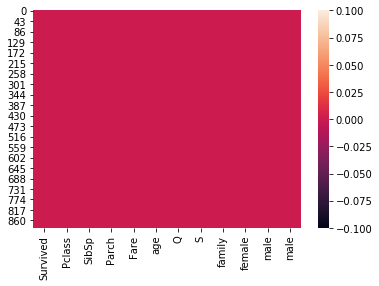

In [162]:
sns.heatmap(df.isnull())

In [181]:
X_train = df.drop('Survived', axis = 1)

In [182]:
y_train = df['Survived']

In [183]:
X_train

Pclass  SibSp  Parch      Fare    age  Q  S  family  male
0         3      1      0    7.2500  22.00  0  1       1     1
1         1      1      0   71.2833  38.00  0  0       1     0
2         3      0      0    7.9250  26.00  0  1       0     0
3         1      1      0   53.1000  35.00  0  1       1     0
4         3      0      0    8.0500  35.00  0  1       0     1
5         3      0      0    8.4583  25.14  1  0       0     1
6         1      0      0   51.8625  54.00  0  1       0     1
7         3      3      1   21.0750   2.00  0  1       4     1
8         3      0      2   11.1333  27.00  0  1       2     0
9         2      1      0   30.0708  14.00  0  0       1     0
10        3      1      1   16.7000   4.00  0  1       2     0
11        1      0      0   26.5500  58.00  0  1       0     0
12        3      0      0    8.0500  20.00  0  1       0     1
13        3      1      5   31.2750  39.00  0  1       6     1
14        3      0      0    7.8542  14.00  0  1       0     0
15        2      0      0   16.0000  55.00  0  1       0     0
16        3      4      1   29.1250   2.00  1  0       5     1
17        2      0      0   13.0000  29.87  0  1       0     1
18        3      1      0   18.0000  31.00  0  1       1     0
19        3      0      0    7.2250  25.14  0  0       0     0
20        2      0      0   26.0000  35.00  0  1       0     1
21        2      0      0   13.0000  34.00  0  1       0     1
22        3      0      0    8.0292  15.00  1  0       0     0
23        1      0      0   35.5000  28.00  0  1       0     1
24        3      3      1   21.0750   8.00  0  1       4     0
25        3      1      5   31.3875  38.00  0  1       6     0
26        3      0      0    7.2250  25.14  0  0       0     1
27        1      3      2  263.0000  19.00  0  1       5     1
28        3      0      0    7.8792  25.14  1  0       0     0
29        3      0      0    7.8958  25.14  0  1       0     1
30        1      0      0   27.7208  40.00  0  0       0     1
31        1      1      0  146.5208  38.23  0  0       1     0
32        3      0      0    7.7500  25.14  1  0       0     0
33        2      0      0   10.5000  66.00  0  1       0     1
34        1      1      0   82.1708  28.00  0  0       1     1
35        1      1      0   52.0000  42.00  0  1       1     1
36        3      0      0    7.2292  25.14  0  0       0     1
37        3      0      0    8.0500  21.00  0  1       0     1
38        3      2      0   18.0000  18.00  0  1       2     0
39        3      1      0   11.2417  14.00  0  0       1     0
40        3      1      0    9.4750  40.00  0  1       1     0
41        2      1      0   21.0000  27.00  0  1       1     0
42        3      0      0    7.8958  25.14  0  0       0     1
43        2      1      2   41.5792   3.00  0  0       3     0
44        3      0      0    7.8792  19.00  1  0       0     0
45        3      0      0    8.0500  25.14  0  1       0     1
46        3      1      0   15.5000  25.14  1  0       1     1
47        3      0      0    7.7500  25.14  1  0       0     0
48        3      2      0   21.6792  25.14  0  0       2     1
49        3      1      0   17.8000  18.00  0  1       1     0
50        3      4      1   39.6875   7.00  0  1       5     1
51        3      0      0    7.8000  21.00  0  1       0     1
52        1      1      0   76.7292  49.00  0  0       1     0
53        2      1      0   26.0000  29.00  0  1       1     0
54        1      0      1   61.9792  65.00  0  0       1     1
55        1      0      0   35.5000  38.23  0  1       0     1
56        2      0      0   10.5000  21.00  0  1       0     0
57        3      0      0    7.2292  28.50  0  0       0     1
58        2      1      2   27.7500   5.00  0  1       3     0
59        3      5      2   46.9000  11.00  0  1       7     1
60        3      0      0    7.2292  22.00  0  0       0     1
61        1      0      0   80.0000  38.00  0  0       0     0
62        1      1      0   83.4750 

In [184]:
y_train

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

SGD CLASSIFIER

In [185]:
from sklearn.linear_model import SGDClassifier

In [186]:
sgd_clf = SGDClassifier(random_state = 42)

In [187]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [188]:
from sklearn.model_selection import cross_val_predict

In [192]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 10)

In [193]:
from sklearn.metrics import classification_report, confusion_matrix

In [194]:
print(confusion_matrix(y_train,y_train_pred))

[[421 128]
 [188 154]]


In [195]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       549
           1       0.55      0.45      0.49       342

    accuracy                           0.65       891
   macro avg       0.62      0.61      0.61       891
weighted avg       0.64      0.65      0.64       891



In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
reg = LogisticRegression()

In [200]:
reg.fit(X_train, y_train)

C:\Users\skoli\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [201]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [204]:
y_train_pred2 = cross_val_predict(rfc, X_train, y_train, cv = 10)

In [205]:
print(confusion_matrix(y_train,y_train_pred2))

[[470  79]
 [ 89 253]]


In [206]:
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       549
           1       0.76      0.74      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



Final Eval

In [250]:
test = pd.read_csv('test.csv')

In [251]:
test

PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jones, Mr. Charles Cresson   
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13           905       2                               Howard, Mr. Benjamin   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
15           907       2      del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
16           908       2                                  Keane, Mr. Daniel   
17           909       3                                  Assaf, Mr. Gerios   
18           910       3                       Ilmakangas, Miss. Ida Livija   
19           911       3              Assaf Khalil, Mrs. Mariana (Miriam")"   
20           912       1                             Rothschild, Mr. Martin   
21           913       3                          Olsen, Master. Artur Karl   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
23           915       1                    Williams, Mr. Richard Norris II   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
25           917       3                            Robins, Mr. Alexander A   
26           918       1                       Ostby, Miss. Helene Ragnhild   
27           919       3                                  Daher, Mr. Shedid   
28           920       1                            Brady, Mr. John Bertram   
29           921       3                                  Samaan, Mr. Elias   
30           922       2                       Louch, Mr. Charles Alexander   
31           923       2                      Jefferys, Mr. Clifford Thomas   
32           924       3           Dean, Mrs. Bertram (Eva Georgetta Light)   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
34           926       1                           Mock, Mr. Philipp Edmund   
35           927       3   Katavelas, Mr. Vassilios (Catavelas Vassilios")"   
36           928       3                                Roth, Miss. Sarah A   
37           929       3                                 Cacic, Miss. Manda   
38           930       3                                    Sap, Mr. Julius   
39           931       3                                      Hee, Mr. Ling   
40           932       3                                   Karun, Mr. Franz   
41           933       1                        Franklin, Mr. Thomas Parham   
42           934       3                              Goldsmith, Mr. Nathan   
43           935       2              Corbett, Mrs. Walter H (Irene Colvin)   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
45           937       3                    Peltomaki, Mr. Nikolai Johannes   
46           938       1                           Chevre, Mr. Paul Romaine   
47           939       3                           Shaughnessy, Mr. Patrick   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
49           941       3     Coutts, Mrs. William (Winn

In [252]:
test['age'] = test[['Age','Pclass']].apply(age_append, axis = 1)
test.drop(['Age'], inplace = True, axis = 1)
dummyem = pd.get_dummies(test['Embarked'], drop_first= True)
test = pd.concat([test, dummyem], axis = 1)
test.drop(['Embarked'], inplace = True, axis = 1)
test.drop('Name', axis =1, inplace = True)
test.drop('Ticket', axis =1, inplace = True)
test.drop('PassengerId', axis =1, inplace = True)
test['family'] = test[['SibSp', 'Parch']].apply(fam_add, axis = 1)
test.drop('Cabin', axis =1, inplace = True)
mf = pd.get_dummies(test['Sex'], drop_first= True )
test= pd.concat([test, mf], axis = 1)

In [253]:
test

Pclass     Sex  SibSp  Parch      Fare    age  Q  S  family  male
0         3    male      0      0    7.8292  34.50  1  0       0     1
1         3  female      1      0    7.0000  47.00  0  1       1     0
2         2    male      0      0    9.6875  62.00  1  0       0     1
3         3    male      0      0    8.6625  27.00  0  1       0     1
4         3  female      1      1   12.2875  22.00  0  1       2     0
5         3    male      0      0    9.2250  14.00  0  1       0     1
6         3  female      0      0    7.6292  30.00  1  0       0     0
7         2    male      1      1   29.0000  26.00  0  1       2     1
8         3  female      0      0    7.2292  18.00  0  0       0     0
9         3    male      2      0   24.1500  21.00  0  1       2     1
10        3    male      0      0    7.8958  25.14  0  1       0     1
11        1    male      0      0   26.0000  46.00  0  1       0     1
12        1  female      1      0   82.2667  23.00  0  1       1     0
13        2    male      1      0   26.0000  63.00  0  1       1     1
14        1  female      1      0   61.1750  47.00  0  1       1     0
15        2  female      1      0   27.7208  24.00  0  0       1     0
16        2    male      0      0   12.3500  35.00  1  0       0     1
17        3    male      0      0    7.2250  21.00  0  0       0     1
18        3  female      1      0    7.9250  27.00  0  1       1     0
19        3  female      0      0    7.2250  45.00  0  0       0     0
20        1    male      1      0   59.4000  55.00  0  0       1     1
21        3    male      0      1    3.1708   9.00  0  1       1     1
22        1  female      0      0   31.6833  38.23  0  1       0     0
23        1    male      0      1   61.3792  21.00  0  0       1     1
24        1  female      1      3  262.3750  48.00  0  0       4     0
25        3    male      1      0   14.5000  50.00  0  1       1     1
26        1  female      0      1   61.9792  22.00  0  0       1     0
27        3    male      0      0    7.2250  22.50  0  0       0     1
28        1    male      0      0   30.5000  41.00  0  1       0     1
29        3    male      2      0   21.6792  25.14  0  0       2     1
30        2    male      1      0   26.0000  50.00  0  1       1     1
31        2    male      2      0   31.5000  24.00  0  1       2     1
32        3  female      1      2   20.5750  33.00  0  1       3     0
33        3  female      1      2   23.4500  25.14  0  1       3     0
34        1    male      1      0   57.7500  30.00  0  0       1     1
35        3    male      0      0    7.2292  18.50  0  0       0     1
36        3  female      0      0    8.0500  25.14  0  1       0     0
37        3  female      0      0    8.6625  21.00  0  1       0     0
38        3    male      0      0    9.5000  25.00  0  1       0     1
39        3    male      0      0   56.4958  25.14  0  1       0     1
40        3    male      0      1   13.4167  39.00  0  0       1     1
41        1    male      0      0   26.5500  38.23  0  1       0     1
42        3    male      0      0    7.8500  41.00  0  1       0     1
43        2  female      0      0   13.0000  30.00  0  1       0     0
44        1  female      1      0   52.5542  45.00  0  1       1     0
45        3    male      0      0    7.9250  25.00  0  1       0     1
46        1    male      0      0   29.7000  45.00  0  0       0     1
47        3    male      0      0    7.7500  25.14  1  0       0     1
48        1  female      0      0   76.2917  60.00  0  0       0     0
49        3  female      0      2   15.9000  36.00  0  1       2     0
50        1    male      1      0   60.0000  24.00  0  1       1     1
51        2    male      0      0   15.0333  27.00  0  0       0     1
52        2  female      2      1   23.0000  20.00  0  1       3     0
53        1  female      3      2  263.0000  28.00  0  1       5     0
54        2    male      0      0   15.5792  29.87  0  0       0     1
55        3    male      4   

In [255]:
test.drop('Sex', axis = 1, inplace = True)
test


Pclass  SibSp  Parch      Fare    age  Q  S  family  male
0         3      0      0    7.8292  34.50  1  0       0     1
1         3      1      0    7.0000  47.00  0  1       1     0
2         2      0      0    9.6875  62.00  1  0       0     1
3         3      0      0    8.6625  27.00  0  1       0     1
4         3      1      1   12.2875  22.00  0  1       2     0
5         3      0      0    9.2250  14.00  0  1       0     1
6         3      0      0    7.6292  30.00  1  0       0     0
7         2      1      1   29.0000  26.00  0  1       2     1
8         3      0      0    7.2292  18.00  0  0       0     0
9         3      2      0   24.1500  21.00  0  1       2     1
10        3      0      0    7.8958  25.14  0  1       0     1
11        1      0      0   26.0000  46.00  0  1       0     1
12        1      1      0   82.2667  23.00  0  1       1     0
13        2      1      0   26.0000  63.00  0  1       1     1
14        1      1      0   61.1750  47.00  0  1       1     0
15        2      1      0   27.7208  24.00  0  0       1     0
16        2      0      0   12.3500  35.00  1  0       0     1
17        3      0      0    7.2250  21.00  0  0       0     1
18        3      1      0    7.9250  27.00  0  1       1     0
19        3      0      0    7.2250  45.00  0  0       0     0
20        1      1      0   59.4000  55.00  0  0       1     1
21        3      0      1    3.1708   9.00  0  1       1     1
22        1      0      0   31.6833  38.23  0  1       0     0
23        1      0      1   61.3792  21.00  0  0       1     1
24        1      1      3  262.3750  48.00  0  0       4     0
25        3      1      0   14.5000  50.00  0  1       1     1
26        1      0      1   61.9792  22.00  0  0       1     0
27        3      0      0    7.2250  22.50  0  0       0     1
28        1      0      0   30.5000  41.00  0  1       0     1
29        3      2      0   21.6792  25.14  0  0       2     1
30        2      1      0   26.0000  50.00  0  1       1     1
31        2      2      0   31.5000  24.00  0  1       2     1
32        3      1      2   20.5750  33.00  0  1       3     0
33        3      1      2   23.4500  25.14  0  1       3     0
34        1      1      0   57.7500  30.00  0  0       1     1
35        3      0      0    7.2292  18.50  0  0       0     1
36        3      0      0    8.0500  25.14  0  1       0     0
37        3      0      0    8.6625  21.00  0  1       0     0
38        3      0      0    9.5000  25.00  0  1       0     1
39        3      0      0   56.4958  25.14  0  1       0     1
40        3      0      1   13.4167  39.00  0  0       1     1
41        1      0      0   26.5500  38.23  0  1       0     1
42        3      0      0    7.8500  41.00  0  1       0     1
43        2      0      0   13.0000  30.00  0  1       0     0
44        1      1      0   52.5542  45.00  0  1       1     0
45        3      0      0    7.9250  25.00  0  1       0     1
46        1      0      0   29.7000  45.00  0  0       0     1
47        3      0      0    7.7500  25.14  1  0       0     1
48        1      0      0   76.2917  60.00  0  0       0     0
49        3      0      2   15.9000  36.00  0  1       2     0
50        1      1      0   60.0000  24.00  0  1       1     1
51        2      0      0   15.0333  27.00  0  0       0     1
52        2      2      1   23.0000  20.00  0  1       3     0
53        1      3      2  263.0000  28.00  0  1       5     0
54        2      0      0   15.5792  29.87  0  0       0     1
55        3      4      1   29.1250  10.00  1  0       5     1
56        3      0      0    7.8958  35.00  0  1       0     1
57        3      0      0    7.6500  25.00  0  1       0     1
58        3      1      0   16.1000  25.14  0  1       1     1
59        1      0      0  262.3750  36.00  0  0       0     0
60        3      0      0    7.8958  17.00  0  1       0     1
61        2      0      0   13.5000  32.00  0  1       0     1
62        3      0      0    7.7500 

In [256]:
answer = rfc.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').